In [73]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from numpy import array

pd.set_option('display.max_rows', 200)

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)
# eco_csv.head()

In [3]:
# New dataframe with only GDP, HDI & Footprint
my_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,4,10,17]])
my_df['GDP per Capita'] = my_df['GDP per Capita'].str.replace('$','')
my_df['GDP per Capita'] = my_df['GDP per Capita'].str.replace(',','')
my_df['GDP per Capita'] = my_df['GDP per Capita'].astype(float)
my_df['Footprint per Mil Persons'] = my_df['Total Ecological Footprint']/my_df['Population (millions)']
my_df.dropna(how='any', inplace=True)
# my_df.count()
# my_df.dtypes
my_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Biocapacity Deficit or Reserve,Footprint per Mil Persons
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.79,-0.30,0.026492
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,2.21,-1.03,0.699367
2,Algeria,Africa,38.48,0.73,5430.57,2.12,-1.53,0.055094
3,Angola,Africa,20.82,0.52,4665.91,0.93,1.61,0.044669
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,5.38,-4.44,59.777778


## Scatter Plot of Countries Weighted by Footprint

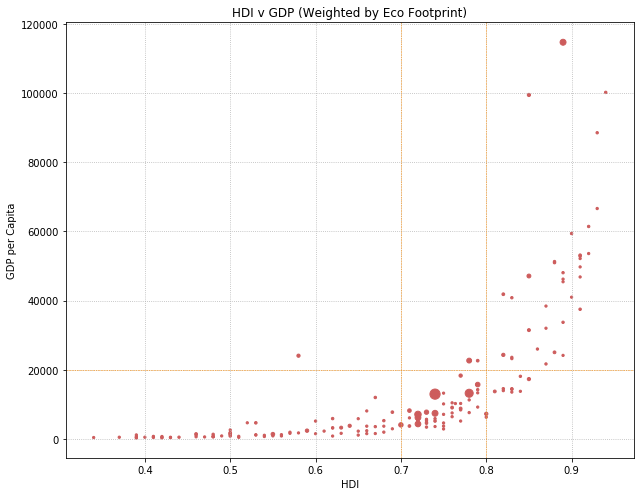

In [112]:
# Data lists
hdi = my_df['HDI'].tolist()
gdp = my_df['GDP per Capita'].tolist()
# bdr = my_df['Biocapacity Deficit or Reserve'].tolist()
footprint = my_df['Footprint per Mil Persons'].tolist()
footprint = [dot+5 for dot in footprint]

# Set up axes and labels
fig, ax = plt.subplots(figsize=(9,7))
plt.grid(linestyle='dotted')
# gdp_max = plt.axhline(y=30000, linewidth=0.5, linestyle = '--', color='darkorange')
gdp_min = plt.axhline(y=20000, linewidth=0.5, linestyle = '--', color='darkorange')
hdi_max = plt.axvline(x=0.80, linewidth=0.5, linestyle = '--', color='darkorange')
hdi_min = plt.axvline(x=0.70, linewidth=0.5, linestyle = '--', color='darkorange')

# Developed Status shaded range
# x = np.linspace(XMIN,XMAX,100)
# y = np.linspace(YMIN,YMAX,100)
# X,Y = np.meshgrid(x,y)
# xbins = np.array(range(0,10,1))
# ybins = np.array(range(12000,20000,5000))
# xbins = np.zeros(xbins)
# X, Y = np.meshgrid(xbins, ybins)
# c = ax.pcolor(xbins, ybins)

# Plot the chart
plt.scatter(hdi, gdp, s=footprint, color='indianred')
plt.title('HDI v GDP (Weighted by Eco Footprint)')
plt.xlabel('HDI')
plt.ylabel('GDP per Capita')

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/footprint_hdi_scatter.png')
plt.show()


## Eco Footprint of Developed Countries

In [109]:
# Developed countries only
developed = eco_csv.loc[(eco_csv['HDI']>=0.8),:]
# developed_c = developed['Country'].tolist()
# developed_c
developed_df = pd.DataFrame(eco_csv.iloc[:,[0,3,5,6,7,8,9,10]])
developed_df.dropna(how='any', inplace=True)
# developed_df.count()
# developed_df

In [110]:
# Developed countries grouped by HDI
bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
group_names = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

developed_df['HDI_groups'] = pd.cut(developed_df['HDI'], bins, labels=group_names)
dev_footprint = developed_df.groupby('HDI_groups').sum()
dev_footprint.pop('HDI')
dev_footprint

,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint
HDI_groups,,,,,,
<0.4,2.58,2.31,2.04,0.45,0.24,7.93
0.41-0.5,8.98,4.88,7.40,5.69,2.46,30.65
0.51-0.6,6.69,2.52,7.53,8.27,1.46,27.61
0.61-0.7,12.54,6.68,6.77,25.87,2.29,55.57
0.71-0.8,28.71,15.55,13.51,96.23,6.78,163.58
0.81-0.9,25.90,7.63,16.90,116.72,4.02,174.31
>0.9,11.44,3.63,7.22,41.09,1.97,66.72


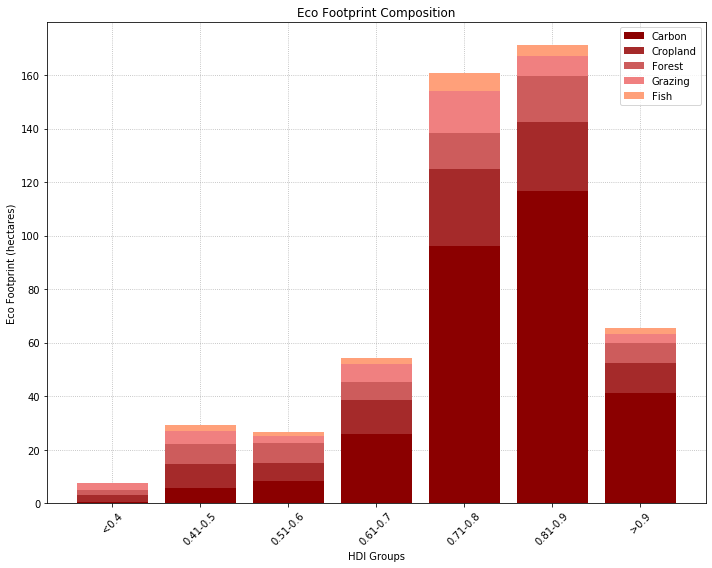

In [115]:
# Data lists
carbon_foot = dev_footprint['Carbon Footprint']
crop_foot = dev_footprint['Cropland Footprint']
forest_foot = dev_footprint['Forest Footprint']
grazing_foot = dev_footprint['Grazing Footprint']
fish_foot = dev_footprint['Fish Footprint']

# Set up axes and labels
fig, ax = plt.subplots(figsize=(10,8))
x_ticks = np.arange(len(group_names))
ax.set_xticks(x_ticks)
ax.set_xticklabels(group_names, rotation=45)
plt.grid(linestyle='dotted', zorder=0)
plt.title('Eco Footprint Composition')
plt.xlabel('HDI Groups')
plt.ylabel('Eco Footprint (hectares)')
    
# Calculate the bottoms of each stacked bar
crop_bottom = carbon_foot
forest_bottom = np.add(carbon_foot, crop_foot)
grazing_bottom = np.add(forest_bottom, forest_foot)
fish_bottom = np.add(grazing_bottom, grazing_foot)

# Plot the stacked bar chart
carbon_bar = plt.bar(x_ticks, carbon_foot, width=0.8, color='darkred', zorder=2)
crop_bar = plt.bar(x_ticks, crop_foot, width=0.8, bottom=crop_bottom, color='brown', zorder=2)
forest_bar = plt.bar(x_ticks, forest_foot, width=0.8, bottom=forest_bottom, color='indianred', zorder=2)
grazing_bar = plt.bar(x_ticks, grazing_foot, width=0.8, bottom=grazing_bottom, color='lightcoral', zorder=2)
fish_bar = plt.bar(x_ticks, fish_foot, width=0.8, bottom=fish_bottom, color='lightsalmon', zorder=2)

plt.legend((carbon_bar, crop_bar, forest_bar, grazing_bar, fish_bar), ('Carbon', 'Cropland', 'Forest', 'Grazing', 'Fish'))

# Save and show the figure
plt.tight_layout()
plt.savefig('Images/footprint_hdi_bar.png')
plt.show()


## Number of Developed Countries (HDI >= 0.8)

In [90]:
developed = eco_csv.loc[(eco_csv['HDI']>=0.8),:]
developed['Country'].count()
# developed_c = developed['Country'].tolist()

45

## Number of Developed Countries with Earths Required > 1.0 

In [96]:
earths_d = developed.loc[(developed['Earths Required']>1.0),:]
earths_d['Country'].count()

45

## Number of Developing Countries (HDI Between 0.7 & 0.8)

In [85]:
developing = eco_csv.loc[(eco_csv['HDI']>=0.7) & (eco_csv['HDI']<0.8),:]
developing['Country'].count()
# developing_c = developing['Country'].tolist()

51

## Number of Undeveloped Countries (HDI <= 0.5)

In [91]:
undeveloped = eco_csv.loc[(eco_csv['HDI']<=0.5),:]
undeveloped['Country'].count()
# undeveloped_c = undeveloped['Country'].tolist()

33

## Number of Countries with Earths Required > 1.0

In [97]:
earths = eco_csv.loc[(eco_csv['Earths Required']>1.0),:]
earths['Country'].count()

129